In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
database_path = "hawaii.sqlite"
engine = create_engine(f"sqlite:///{database_path}")
# conn = engine.connect()

In [6]:
# reflect an existing database into a new model
measurement_data = engine.execute("SELECT * FROM Measurement")
# # reflect the tables
for record in measurement_data:
    print(record)

.38, 70.0)
(19140, 'USC00516128', '2016-06-16', 0.12, 70.0)
(19141, 'USC00516128', '2016-06-17', 1.27, 69.0)
(19142, 'USC00516128', '2016-06-18', 0.72, 73.0)
(19143, 'USC00516128', '2016-06-19', 0.79, 74.0)
(19144, 'USC00516128', '2016-06-20', 0.52, 72.0)
(19145, 'USC00516128', '2016-06-21', 0.78, 71.0)
(19146, 'USC00516128', '2016-06-22', 0.2, 73.0)
(19147, 'USC00516128', '2016-06-23', 0.9, 72.0)
(19148, 'USC00516128', '2016-06-25', None, 73.0)
(19149, 'USC00516128', '2016-06-26', 0.7, 74.0)
(19150, 'USC00516128', '2016-06-27', 0.3, 72.0)
(19151, 'USC00516128', '2016-06-28', 0.25, 74.0)
(19152, 'USC00516128', '2016-06-29', 0.35, 72.0)
(19153, 'USC00516128', '2016-07-01', None, 74.0)
(19154, 'USC00516128', '2016-07-04', None, 74.0)
(19155, 'USC00516128', '2016-07-05', 0.45, 71.0)
(19156, 'USC00516128', '2016-07-06', 1.46, 71.0)
(19157, 'USC00516128', '2016-07-07', 0.92, 73.0)
(19158, 'USC00516128', '2016-07-08', 0.31, 73.0)
(19159, 'USC00516128', '2016-07-09', 0.15, 71.0)
(19160, 'USC0

In [7]:
# reflect an existing database into a new model
station_data = engine.execute("SELECT * FROM Station")
# # reflect the tables
for record in station_data:
    print(record)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [8]:
# View all of the classes that automap found
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

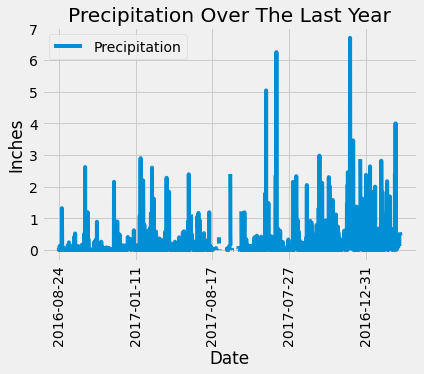

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 


# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_year = dt.datetime(2017,8,23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= previous_year).all()

print_rows = [{"Precipitation": result[1], "Date": result[0]} for result in results]
print_rows
# print(print_rows)

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df=pd.DataFrame(print_rows).set_index("Date")
precipitation_df.plot(kind="line")
x_axis= ['Date']
y_axis= ['Precipitation']
plt.title("Precipitation Over The Last Year")
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Inches")
plt.show()

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data




In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
average_precipitation=precipitation_df["Precipitation"].describe()
average_precipitation

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [25]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.station).count()

9

In [52]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_USC00519397=session.query(Measurement.station).filter(Measurement.station=='USC00519397').count()
print(station_USC00519397)

2724


In [53]:
station_USC00513117=session.query(Measurement.station).filter(Measurement.station=='USC00513117').count()
print(station_USC00513117)

2709


In [54]:
station_USC00514830=session.query(Measurement.station).filter(Measurement.station=='USC00514830').count()
print(station_USC00514830)

2202


In [55]:
station_USC00517948=session.query(Measurement.station).filter(Measurement.station=='USC00517948').count()
print(station_USC00517948)

1372


In [57]:
station_USC00518838=session.query(Measurement.station).filter(Measurement.station=='USC00518838').count()
print(station_USC00518838)

511


In [58]:
station_USC00519523=session.query(Measurement.station).filter(Measurement.station=='USC00519523').count()
print(station_USC00519523)

2669


In [59]:
station_USC00519281=session.query(Measurement.station).filter(Measurement.station=='USC00519281').count()
print(station_USC00519281)

2772


In [60]:
station_USC00511918=session.query(Measurement.station).filter(Measurement.station=='USC00511918').count()
print(station_USC00511918)

1979


In [61]:
station_USC00516128=session.query(Measurement.station).filter(Measurement.station=='USC00516128').count()
print(station_USC00516128)

2612


In [71]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp_station_USC00519281=session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').order_by(Measurement.tobs.asc()).first()
print(lowest_temp_station_USC00519281)

(54.0,)


In [67]:
highest_temp_station_USC00519281=session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').order_by(Measurement.tobs.desc()).first()
print(highest_temp_station_USC00519281)

(85.0,)


In [88]:
average_temp_station_USC00519281=session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').count()
print(average_temp_station_USC00519281)

2772


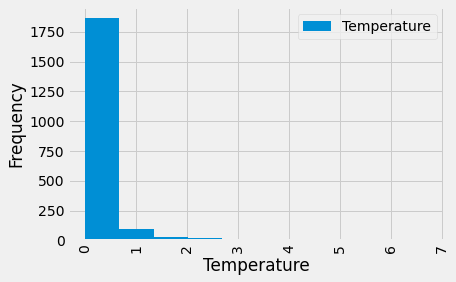

In [95]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_results = session.query(Measurement.date, Measurement.station, Measurement.tobs).filter(Measurement.station == 'USC00519281').all()
#print(station_results)

print_rows = [{"Temperature": result[1], "Station": result[0], "Date": result[-1]} for result in results]
print_rows
#print(print_rows)

# Save the query results as a Pandas DataFrame and set the index to the date column
station_precipitation_df=pd.DataFrame(print_rows).set_index("Date")
station_precipitation_df.plot(kind="hist")
x_axis= ['Temperature']
y_axis= ['Station']
plt.xlabel("Temperature")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()

# Close session

In [117]:
# Close Session
session.close()